In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [49]:
df = pd.read_csv("Housing.csv")

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [50]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [52]:
df.dropna(inplace = True)

In [53]:
df.count()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [54]:
X = df.drop(["price"],axis = 1)

In [55]:
y = df["price"]

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [57]:
train_data = X_train.join(y_train)

In [58]:
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
6,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,10150000
159,3150,3,2,1,yes,yes,yes,no,yes,0,no,furnished,5460000
139,6360,3,1,1,yes,yes,yes,no,yes,2,yes,furnished,5740000
191,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished,5040000
499,3630,3,3,2,no,yes,no,no,no,0,no,unfurnished,2660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished,3423000
418,3500,4,1,2,yes,no,no,no,yes,2,no,unfurnished,3360000
477,4960,2,1,1,yes,no,no,no,no,0,no,unfurnished,2940000
460,8100,2,1,1,yes,no,no,no,no,1,no,unfurnished,3087000


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

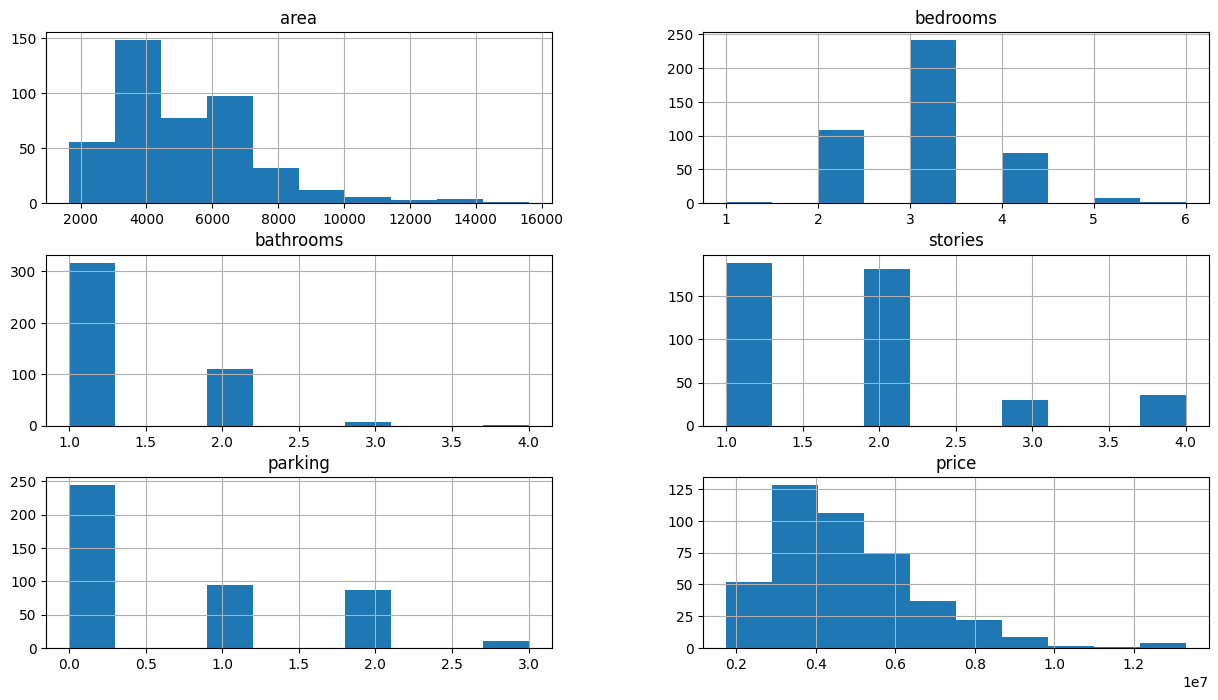

In [59]:
train_data.hist(figsize = (15,8))

In [60]:
train_data['bedrooms'] = np.log(train_data['bedrooms']+1)
train_data['bathrooms'] = np.log(train_data['bedrooms']+1)
train_data['stories'] = np.log(train_data['bedrooms']+1)
train_data['parking'] = np.log(train_data['bedrooms']+1)


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

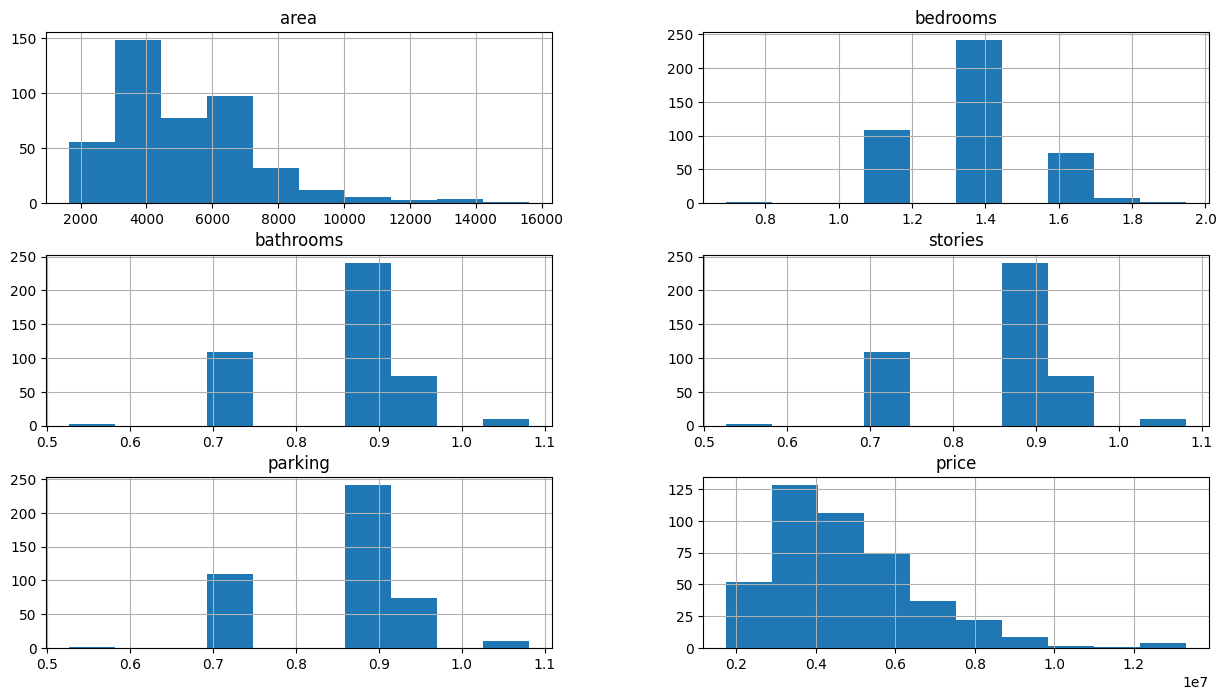

In [61]:
train_data.hist(figsize = (15,8))

In [62]:
train_data = train_data.join(pd.get_dummies(train_data.furnishingstatus)).drop(["furnishingstatus"], axis = 1)

In [63]:
mapping = {'yes': 1, 'no': 0}

In [64]:
train_data["mainroad_new"] = train_data["mainroad"].map(mapping)

train_data.drop(["mainroad"], axis = 1, inplace = True)

train_data

,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnished,semi-furnished,unfurnished,mainroad_new
6,8580,1.609438,0.959135,0.959135,no,no,no,yes,0.959135,yes,10150000,False,True,False,1
159,3150,1.386294,0.869742,0.869742,yes,yes,no,yes,0.869742,no,5460000,True,False,False,1
139,6360,1.386294,0.869742,0.869742,yes,yes,no,yes,0.869742,yes,5740000,True,False,False,1
191,10700,1.386294,0.869742,0.869742,yes,yes,no,no,0.869742,no,5040000,False,True,False,1
499,3630,1.386294,0.869742,0.869742,yes,no,no,no,0.869742,no,2660000,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,4040,1.098612,0.741276,0.741276,no,no,no,no,0.741276,no,3423000,False,False,True,1
418,3500,1.609438,0.959135,0.959135,no,no,no,yes,0.959135,no,3360000,False,False,True,1
477,4960,1.098612,0.741276,0.741276,no,no,no,no,0.741276,no,2940000,False,False,True,1
460,8100,1.098612,0.741276,0.741276,no,no,no,no,0.741276,no,3087000,False,False,True,1


<Axes: >

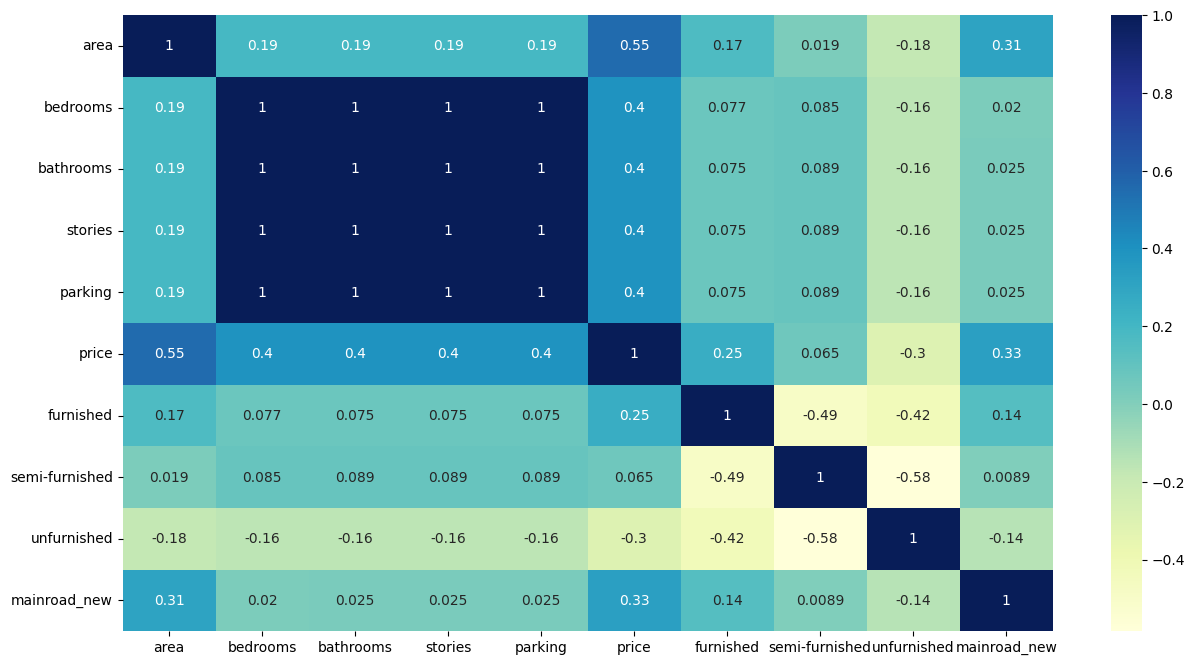

In [65]:
plt.figure(figsize =(15,8))
train_data_temp = train_data.drop(["airconditioning","hotwaterheating","guestroom","prefarea","basement"], axis = 1)
sns.heatmap(train_data_temp.corr(),annot = True, cmap = "YlGnBu")

In [66]:
X_train = train_data.drop(["price","airconditioning","hotwaterheating","guestroom","prefarea",'basement'],axis = 1)
y_train = train_data["price"]

X_train

,area,bedrooms,bathrooms,stories,parking,furnished,semi-furnished,unfurnished,mainroad_new
6,8580,1.609438,0.959135,0.959135,0.959135,False,True,False,1
159,3150,1.386294,0.869742,0.869742,0.869742,True,False,False,1
139,6360,1.386294,0.869742,0.869742,0.869742,True,False,False,1
191,10700,1.386294,0.869742,0.869742,0.869742,False,True,False,1
499,3630,1.386294,0.869742,0.869742,0.869742,False,False,True,0
...,...,...,...,...,...,...,...,...,...
414,4040,1.098612,0.741276,0.741276,0.741276,False,False,True,1
418,3500,1.609438,0.959135,0.959135,0.959135,False,False,True,1
477,4960,1.098612,0.741276,0.741276,0.741276,False,False,True,1
460,8100,1.098612,0.741276,0.741276,0.741276,False,False,True,1


In [67]:
y_train

6      10150000
159     5460000
139     5740000
191     5040000
499     2660000
         ...   
414     3423000
418     3360000
477     2940000
460     3087000
71      6755000
Name: price, Length: 436, dtype: int64

In [68]:

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [69]:
test_data = X_test.join(y_test)

test_data['bedrooms'] = np.log(test_data['bedrooms']+1)
test_data['bathrooms'] = np.log(test_data['bedrooms']+1)
test_data['stories'] = np.log(test_data['bedrooms']+1)
test_data['parking'] = np.log(test_data['bedrooms']+1)

test_data = test_data.join(pd.get_dummies(test_data.furnishingstatus)).drop(["furnishingstatus"], axis = 1)

mapping = {'yes': 1, 'no': 0}


test_data["mainroad_new"] = test_data["mainroad"].map(mapping)

test_data.drop(["mainroad"], axis = 1, inplace = True)

X_test = test_data.drop(["price","airconditioning","hotwaterheating","guestroom","prefarea",'basement'],axis = 1)

y_test = test_data["price"]

In [70]:
y_pred = model.predict(X_test)

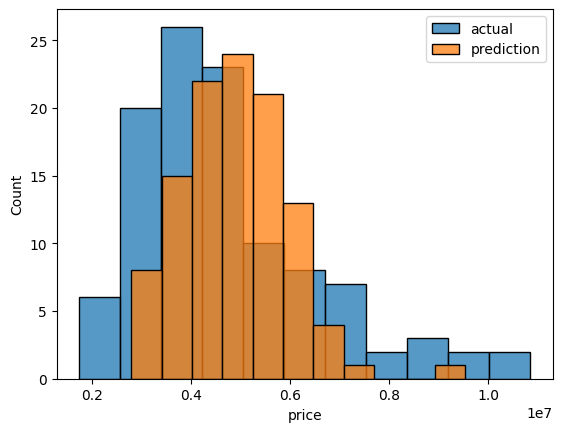

In [71]:
sns.histplot(y_test,label = "actual")
sns.histplot(y_pred,label = "prediction")
plt.legend()

In [72]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

2198057042906.5012


In [73]:
rmse = np.sqrt(mse)
print(rmse)

1482584.5820412748


In [74]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.34033656394280265


In [75]:
with open("models/lin_reg.bin", 'wb') as f_out:
    pickle.dump(model, f_out)